In [1]:
import numpy as np
import pandas as pd
import xarray as xr

from pathlib import Path

import altair as alt
from altair.expr import datum

In [2]:
%load_ext watermark

In [3]:
%watermark --iversions

xarray    0.12.0
altair    3.0.1
numpy     1.16.3
pandas    0.24.2



In [4]:
from utils.load import load_sensitivity_data
from utils.calculate_metrics import (process_data, relative_errors, summary_errors)

## Set paths 

In [5]:
data_path = Path('../data')
path_to_results = data_path / "simulation_results"
khodayari_path = path_to_results / "Khodayari"
millard_path = path_to_results / "Millard"
kurata_path = path_to_results / "Kurata"
chassagnole_path = path_to_results / "Chassagnole"

In [6]:
((zwf_df, pgi_df, eno_df), debug_info) = load_sensitivity_data()

In [7]:
zwf_df.head()

,flux,ID,BiGG_ID,author,sample_id,normalized_flux
0,-0.020954,ACALD,ACALD,Khodayari,dzwf,-0.472740
1,-0.004096,ACALDtpp_ex,composed of ACALDtex and ACALDtpp,Khodayari,dzwf,-0.092400
2,-0.009307,ACKr,ACKr,Khodayari,dzwf,-0.209985
3,4.326233,ACONTa,ACONTa,Khodayari,dzwf,97.604637
4,4.441212,ACONTb,ACONTb,Khodayari,dzwf,100.198682


In [8]:
xdf_zwf = process_data(zwf_df, author="Nicolas")
xdf_pgi = process_data(pgi_df, author="Usui")
xdf_eno = process_data(eno_df, author="Usui")

# 2. Calculate error metrics

In [9]:
x_rel_error_zwf = relative_errors(xdf_zwf, author="Nicolas")
x_rel_error_pgi = relative_errors(xdf_pgi, author="Usui")
x_rel_error_eno = relative_errors(xdf_eno, author="Usui")

In [10]:
x_norm_error_zwf = summary_errors(xdf_zwf, author="Nicolas")
x_norm_error_pgi = summary_errors(xdf_pgi, author="Usui")
x_norm_error_eno = summary_errors(xdf_eno, author="Usui")

# 4. Visualize

### Summary normalized error for the models

In [53]:
from utils.vis import heatmap, summary_chart

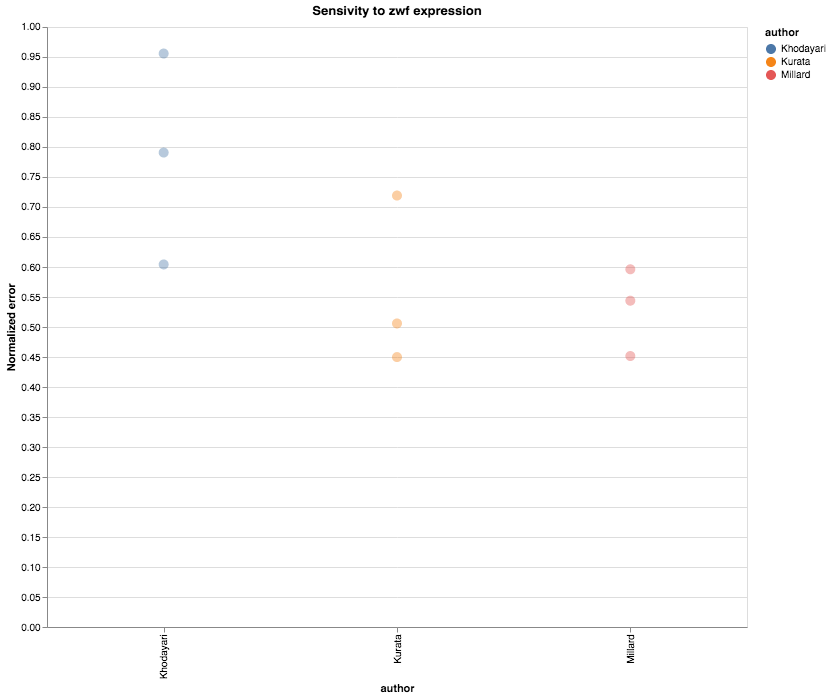

In [56]:
summary_chart(norm_error=x_norm_error_zwf,
              author="Nicolas",
              title="Sensivity to zwf expression",
              sort_list=["Khodayari", "Kurata", "Millard"])

# Export the data

In [33]:
sensitivity_data = pd.concat([selected_data_zwf, selected_data_pgi, selected_data_eno], sort=False)

In [37]:
path = data_path / "Processed"
path.mkdir(parents=True, exist_ok=True)
sensitivity_data.to_csv(path / "sensitivity.csv")